In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# cat - cat

In [122]:
df = pd.read_csv(r'datasets/titanic_.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [61]:
df['Survived'] = df['Survived'].map({0:'not survived', 1: 'Survived'})

In [62]:
df = df.drop('PassengerId', axis = 1)

In [63]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,not survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,not survived,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
df.shape

(891, 11)

In [65]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [66]:
obj_cols = df.dtypes[df.dtypes == 'object'].index.tolist()
obj_cols

['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [67]:
target = 'Survived'

In [68]:
# impute missing values for cat -- mode, for cont - median/mean

In [69]:
df.describe(include = 'O')

,Survived,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,2,891,2,681,147,3
top,not survived,"Thorneycroft, Mr. Percival",male,1601,C23 C25 C27,S
freq,549,1,577,7,4,644


In [70]:
df['Embarked'].mode().values[0]

'S'

In [71]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().values[0])

In [72]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [73]:
obj_cols

['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [74]:
int_cols= df.dtypes[df.dtypes == 'int64'].index.tolist()
int_cols

['Pclass', 'SibSp', 'Parch']

In [75]:
cat_cols = obj_cols + int_cols
print(cat_cols)

['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass', 'SibSp', 'Parch']


In [76]:
cat_cols = ['Sex', 'Pclass', 'Embarked','SibSp', 'Parch' ]

In [77]:
# cat - cat (X - Survived)

In [78]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [79]:
df.Survived.unique()

array(['not survived', 'Survived'], dtype=object)

In [84]:
pd.crosstab(df['Sex'], df['Survived'], normalize = 'index')

Survived,Survived,not survived
Sex,,
female,0.742038,0.257962
male,0.188908,0.811092


In [85]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,Survived,not survived
Sex,,
female,233,81
male,109,468


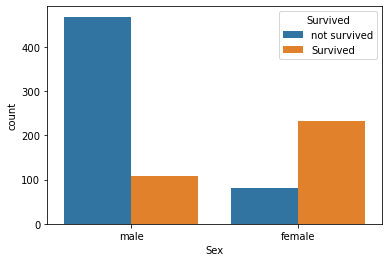

In [86]:
sns.countplot(x = 'Sex', hue = 'Survived', data = df)

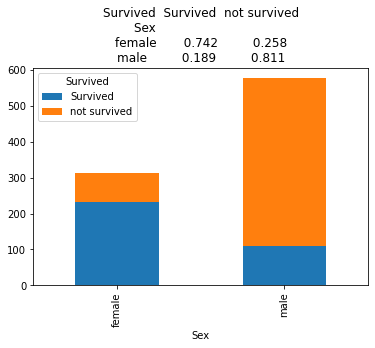

In [94]:
d = pd.crosstab(df['Sex'], df['Survived'], normalize = 'index').round(3)
e = pd.crosstab(df['Sex'], df['Survived'])

e.plot(kind = 'bar', stacked = 'True', title = str(d))

In [117]:
def plot_bva_cat(df, target, cat_cols):

    for col in cat_cols:
        
        r = 1
        c = 2
        plt.rcParams['figure.figsize'] = [15, 5*r]
        
        plt.subplot(r,c,1)
        sns.countplot(x = col, hue = target, data = df)
        
        plt.subplot(r,c,2)
        d = pd.crosstab(df[col], df[target], normalize = 'index').round(3)
        e = pd.crosstab(df[col], df[target])
        e.plot(kind = 'bar', stacked = 'True', title = str(d), ax = plt.gca())
        
        plt.show()


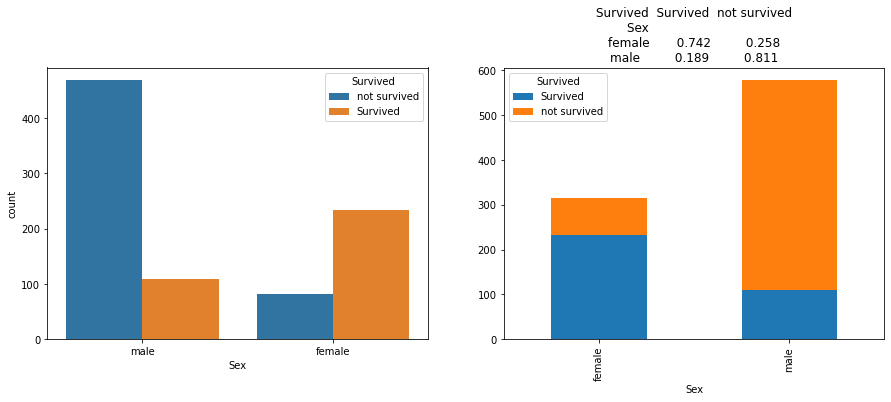

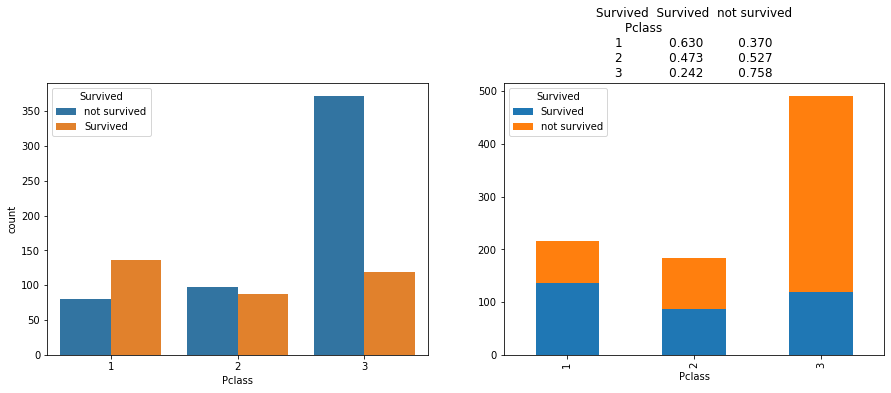

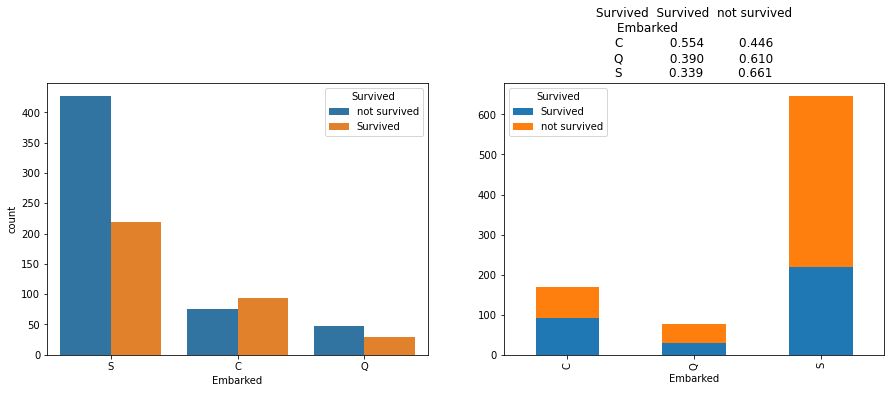

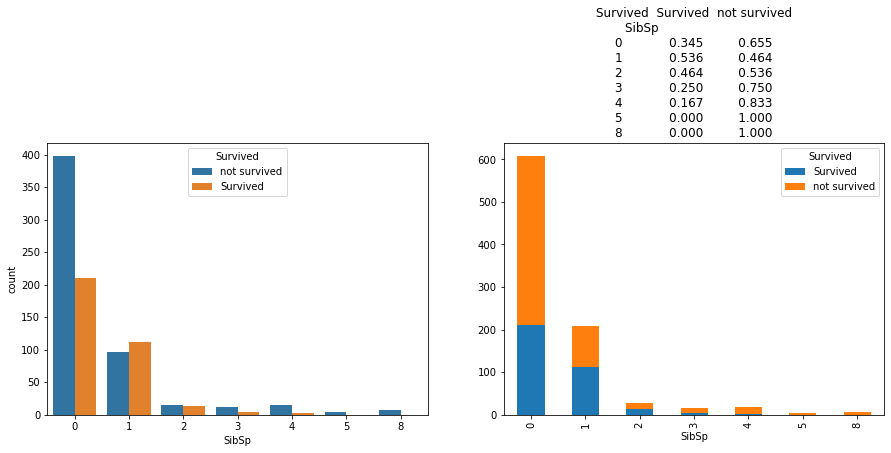

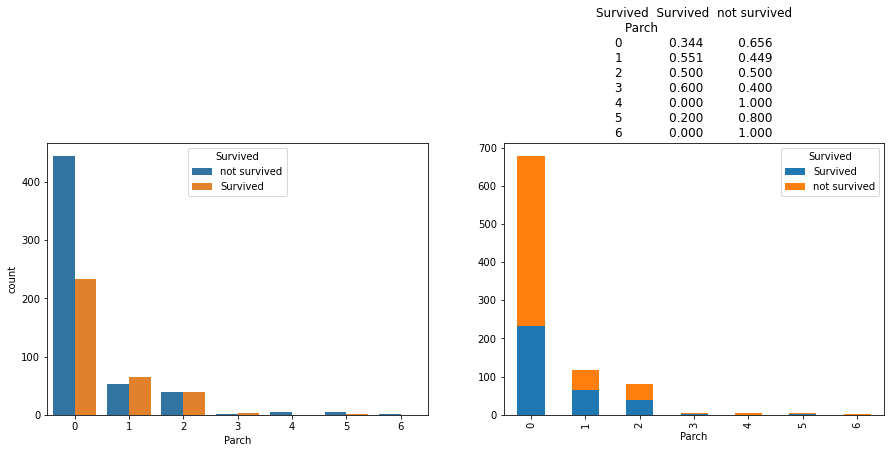

In [118]:
plot_bva_cat(df, target, cat_cols)